In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [462]:
dataset= pd.read_csv("C://Users/Nikolay/Desktop/BTC_USDT_Binance_day_2022-04-30.csv")

In [463]:
dataset.tail(2)

,Date,Low,High,Open,Close,Volumefrom,Volumeto
999,2022-04-29,38175.00,39925.25,39742.07,38596.11,51453.66,2.006136e+09
1000,2022-04-30,38493.52,38795.38,38596.11,38561.58,10723.41,4.143481e+08


In [464]:
dataset['Mean'] = (dataset['Low'] + dataset['High'])/2
dataset.head(2)

,Date,Low,High,Open,Close,Volumefrom,Volumeto,Mean
0,2019-08-04,10552.0,11040.00,10816.86,10929.23,36994.61,4.000992e+08,10796.00
1,2019-08-05,10927.8,11937.52,10929.23,11828.80,59656.47,6.940276e+08,11432.66


In [465]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1001 non-null   object 
 1   Low         1001 non-null   float64
 2   High        1001 non-null   float64
 3   Open        1001 non-null   float64
 4   Close       1001 non-null   float64
 5   Volumefrom  1001 non-null   float64
 6   Volumeto    1001 non-null   float64
 7   Mean        1001 non-null   float64
dtypes: float64(7), object(1)
memory usage: 62.7+ KB


In [466]:
dataset.head(2)

,Date,Low,High,Open,Close,Volumefrom,Volumeto,Mean
0,2019-08-04,10552.0,11040.00,10816.86,10929.23,36994.61,4.000992e+08,10796.00
1,2019-08-05,10927.8,11937.52,10929.23,11828.80,59656.47,6.940276e+08,11432.66


**Каждый день будем предсказывать цену на день вперёд, добавим колонку с фактической ценой на след. день**

In [467]:
steps=-1
dataset_for_prediction= dataset.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head(3)

,Date,Low,High,Open,Close,Volumefrom,Volumeto,Mean,Actual
0,2019-08-04,10552.0,11040.00,10816.86,10929.23,36994.61,4.000992e+08,10796.00,11432.660
1,2019-08-05,10927.8,11937.52,10929.23,11828.80,59656.47,6.940276e+08,11432.66,11778.700
2,2019-08-06,11226.7,12330.70,11828.80,11481.69,69745.18,8.221001e+08,11778.70,11762.005


In [468]:
dataset_for_prediction=dataset_for_prediction.dropna()

**Считаем дневной объём**

In [469]:
dataset_for_prediction['Volume'] = dataset_for_prediction.Volumeto - dataset_for_prediction.Volumefrom

In [470]:
dataset_for_prediction = dataset_for_prediction.drop(['Volumefrom','Volumeto'], axis = 1)

In [471]:
dataset_for_prediction.head(3)

,Date,Low,High,Open,Close,Mean,Actual,Volume
0,2019-08-04,10552.0,11040.00,10816.86,10929.23,10796.00,11432.660,4.000622e+08
1,2019-08-05,10927.8,11937.52,10929.23,11828.80,11432.66,11778.700,6.939680e+08
2,2019-08-06,11226.7,12330.70,11828.80,11481.69,11778.70,11762.005,8.220304e+08


**для рядов необходимо чтобы дата была в индексе, для работы саримакса**

In [472]:
from pandas.tseries.offsets import BDay
dataset_for_prediction['Date'] =pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index= dataset_for_prediction['Date']

In [473]:
dataset_for_prediction = dataset_for_prediction.drop(['Date'], axis = 1)

In [474]:
dataset_for_prediction.head(2)

,Low,High,Open,Close,Mean,Actual,Volume
Date,,,,,,,
2019-08-04,10552.0,11040.00,10816.86,10929.23,10796.00,11432.66,4.000622e+08
2019-08-05,10927.8,11937.52,10929.23,11828.80,11432.66,11778.70,6.939680e+08


In [475]:
dataset_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-08-04 to 2022-04-29
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Low     1000 non-null   float64
 1   High    1000 non-null   float64
 2   Open    1000 non-null   float64
 3   Close   1000 non-null   float64
 4   Mean    1000 non-null   float64
 5   Actual  1000 non-null   float64
 6   Volume  1000 non-null   float64
dtypes: float64(7)
memory usage: 62.5 KB


Text(0.5, 1.0, 'BTC dayly Price')

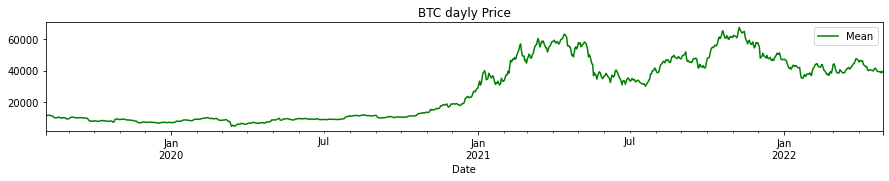

In [476]:
dataset_for_prediction['Mean'].plot(color='green', figsize=(15,2))
plt.legend(['Mean'])
plt.title("BTC dayly Price")

Text(0.5, 1.0, 'BTC dayly Volume')

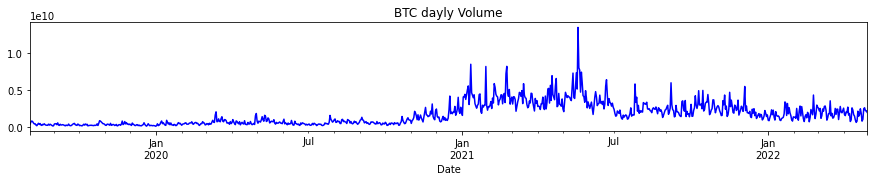

In [477]:
dataset_for_prediction['Volume'].plot(color='blue', figsize=(15,2))
plt.title("BTC dayly Volume")

**Можно заметить, что большой объём соответсвует сильным движениям, после нормировки приложу график**

In [478]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['Low', 'High','Open', 'Close', 'Volume', 'Mean']])
scaled_input =pd.DataFrame(scaled_input)
X=scaled_input

In [479]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [480]:
X= scaled_input

In [481]:
X.rename(columns={0:'Low', 1:'High', 2:'Open', 3:'Close', 4:'Volume', 5:'Mean'}, inplace=True)
X= pd.DataFrame(X)
X.index=dataset_for_prediction.index
X.tail(2)

,Low,High,Open,Close,Volume,Mean
Date,,,,,,
2022-04-28,0.562126,0.550129,0.548988,0.557060,0.157725,0.556093
2022-04-29,0.550812,0.543098,0.557060,0.538791,0.141556,0.546863


In [482]:
y.rename(columns={0:'BTC Price next day'}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,BTC Price next day
Date,
2019-08-04,0.105018
2019-08-05,0.110554


Text(0.5, 1.0, 'Volume BTC hourly')

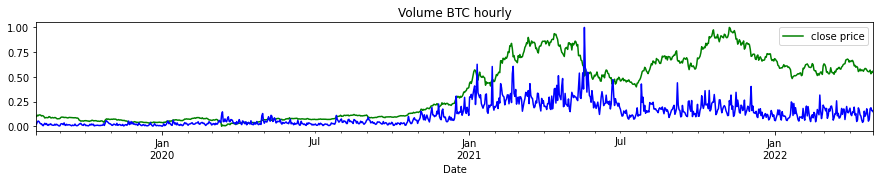

In [483]:
X['Close'].plot(color='green', figsize=(15,2))
plt.legend(['close price'])
X['Volume'].plot(color='blue', figsize=(15,2))
plt.title('Volume BTC hourly')

**ТУТ смотрим движение тренда, сезонность и шум**

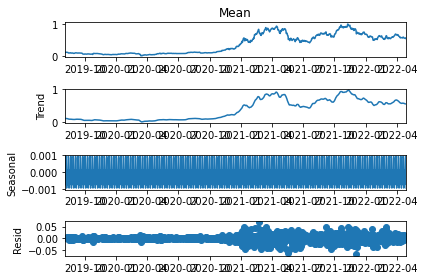

In [484]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Mean'],model='add');
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [485]:
train_size=int(len(dataset) *0.80)
test_size = int(len(dataset)) - train_size
print(test_size)

201


In [486]:
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [487]:
test_X.columns

Index(['Low', 'High', 'Open', 'Close', 'Volume', 'Mean'], dtype='object')

In [488]:
y_test=y['BTC Price next day'][:train_size].dropna()

In [489]:
type(y_test)

pandas.core.series.Series

**Чтобы использовать Саримакс нужно чтобы ряд был стационарным(среднее и дисперсия останутся прежними). Делается тест Augmented Dickey-Fuller(ADF)**

In [490]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [491]:
test_adf(y_test, "BTC Price")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for BTC Price


**Он не стационарный, поэтому используем differencing**

In [492]:
test_adf(y_test.diff(), "BTC Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary BTC Price


<br>**Систематический способ сделать это - использовать графики автокорреляционной функции (ACF) и частичной автокорреляции (PACF) разностных рядов.**
<br>
<br>**График ACF: представляет собой гистограмму коэффициентов корреляции между временным рядом и его запаздыванием. Это помогает определить значение p или термин AR.**
<br>
<br>**График PACF: график частных коэффициентов корреляции между сериями и лагами самих по себе. Помогает определить значение q или термин MA**

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


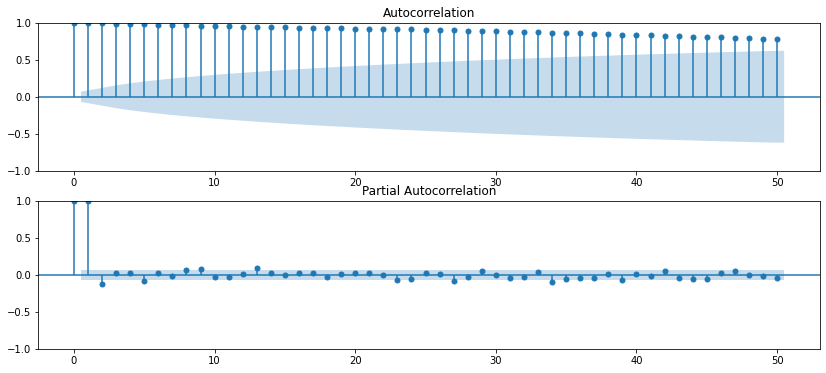

In [493]:
fig,ax= plt.subplots(2,1, figsize=(14,6))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

**Используем pmdarima чтобы посмотреть какая модель дасть на AIC лучший результат**

In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4762.528, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4708.381, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4714.706, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4764.020, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4709.317, Time=0.33 sec


In [ ]:
step_wise.summary()

**Model:	SARIMAX(0, 1, 2)**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
           exog=train_X,
              order=(0,1,2),
              enforce_invertibility=False, enforce_stationarity=False)

In [ ]:
results= model.fit()

In [ ]:
results = model.fit()
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)
print(len(predictions))

In [ ]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

In [ ]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [ ]:
forecast_BTC= pd.DataFrame(forecast_1)
forecast_BTC.reset_index(drop=True, inplace=True)
forecast_BTC.index=test_X.index
forecast_BTC['Actual'] =scaler_output.iloc[train_size:, 0]

In [ ]:
forecast_BTC['predicted_mean'].plot(legend=True)
forecast_BTC['Actual'].plot(legend=True)

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['BTC Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['predicted_mean'], predictions['Actual'])
error

**Преобразуем в цифры**

In [ ]:
testActual = sc_out.inverse_transform(predictions[['Actual']])
testActual_df = pd.DataFrame(testActual)
testActual_df.rename(columns={0:'Actual'}, inplace=True)

In [ ]:
testPredict = sc_out.inverse_transform(predictions[['predicted_mean']])
testPredict_df = pd.DataFrame(testPredict)
testPredict_df.rename(columns={0:'Pred'}, inplace=True)

In [ ]:
absolute_val = pd.concat([testPredict_df, testActual_df], axis=1)

In [ ]:
absolute_val